In [1]:
# 第一個 Cell - 導入必要的模組和設定路徑
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 添加父目錄到 Python 路徑以便導入模組
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# 導入解析器
from core.parsers.txt_parser import TxtParser
from core.parsers.dat_parser import DatParser

# 設定測試檔案路徑
testfile_dir = Path("../../testfile")
print(f"測試檔案目錄: {testfile_dir.absolute()}")
print(f"目錄是否存在: {testfile_dir.exists()}")

# 列出可用的檔案
if testfile_dir.exists():
    txt_files = list(testfile_dir.glob("*.txt"))
    dat_files = list(testfile_dir.glob("*.dat"))
    print(f"\n找到 {len(txt_files)} 個 .txt 檔案")
    print(f"找到 {len(dat_files)} 個 .dat 檔案")
else:
    print("測試檔案目錄不存在，請檢查路徑")

測試檔案目錄: /Users/yangziliang/Git-Projects/keen/backend/test/../../testfile
目錄是否存在: True

找到 1 個 .txt 檔案
找到 4 個 .dat 檔案


In [2]:
# 第二個 Cell - 測試 TXT Parser
def test_txt_parser():
    """測試 TXT 檔案解析器"""
    print("=== 測試 TXT Parser ===")
    
    if not txt_files:
        print("沒有找到 .txt 檔案")
        return None
    
    # 選擇第一個 .txt 檔案進行測試
    txt_file = txt_files[0]
    print(f"測試檔案: {txt_file.name}")
    
    try:
        # 建立 TXT Parser 並解析
        parser = TxtParser(str(txt_file))
        result = parser.parse()
        
        # 顯示解析結果
        print(f"\n實驗資訊:")
        exp_info = result['experiment_info']
        for key, value in exp_info.items():
            print(f"  {key}: {value}")
        
        print(f"\nINT 檔案 ({len(result['int_files'])} 個):")
        for int_file in result['int_files']:
            print(f"  - {int_file['filename']}: {int_file.get('caption', 'N/A')}")
            print(f"    Scale: {int_file.get('scale', 'N/A')}, Unit: {int_file.get('phys_unit', 'N/A')}")
        
        print(f"\nDAT 檔案 ({len(result['dat_files'])} 個):")
        for dat_file in result['dat_files']:
            print(f"  - {dat_file['filename']}: {dat_file.get('caption', 'N/A')}")
            print(f"    模式: {dat_file.get('measurement_mode', 'N/A')}")
            print(f"    網格: {dat_file.get('grid_size', 'N/A')}")
        
        return result
        
    except Exception as e:
        print(f"解析失敗: {e}")
        return None

# 執行 TXT 解析測試
txt_result = test_txt_parser()

=== 測試 TXT Parser ===
測試檔案: 20250521_Janus Stacking SiO2_13K_113.txt

實驗資訊:
  Version: 1.12
  Date: 5/24/2025
  Time: 11:50:41 PM
  UserName: Supervisor
  SetPoint: 3.0E-0010
  SetPointPhysUnit: A
  FeedBackModus: STM2
  Bias: -800.000
  BiasPhysUnit: mV
  Ki: 100.000
  Kp: 0.000
  FeedbackOnCh: 9
  XScanRange: 10.000
  YScanRange: 10.000
  XPhysUnit: nm
  YPhysUnit: nm
  Speed: 1.500 ; lines/sec
  LineRate: 0.750 ; lines/sec
  Angle: -90.000
  xPixel: 500
  yPixel: 500
  yCenter: 13.709
  xCenter: 2.166
  LockInFreq: 23803.10
  LockInFreqPhysUnit: Hz
  LockInAmpl: 0.000
  LockInAmplPhysUnit: V

INT 檔案 (12 個):
  - 20250521_Janus Stacking SiO2_13K_113TopoFwd.int: TopoFwd
    Scale: -2.60913687478663E-0007, Unit: nm
  - 20250521_Janus Stacking SiO2_13K_113TopoBwd.int: TopoBwd
    Scale: -2.60913687478663E-0007, Unit: nm
  - 20250521_Janus Stacking SiO2_13K_113Lia1XFwd.int: Lia1XFwd
    Scale: 1.68210000000000E-0017, Unit: A
  - 20250521_Janus Stacking SiO2_13K_113Lia1XBwd.int: Lia1XBwd
 

In [5]:
# 第三個 Cell - 測試 DAT Parser
def test_dat_parser(txt_result=None):
    """測試 DAT 檔案解析器"""
    print("=== 測試 DAT Parser ===")
    
    if not dat_files:
        print("沒有找到 .dat 檔案")
        return None
    
    # 選擇第一個 .dat 檔案進行測試
    dat_file = dat_files[1]
    print(f"測試檔案: {dat_file.name}")
    
    try:
        # 準備 dat_info (如果有 txt_result 的話)
        dat_info = None
        if txt_result and txt_result['dat_files']:
            # 尋找對應的 dat 檔案資訊
            for dat_desc in txt_result['dat_files']:
                if dat_desc['filename'] == dat_file.name:
                    dat_info = dat_desc
                    break
        
        print(f"DAT 檔案資訊: {dat_info}")
        
        # 建立 DAT Parser 並解析
        parser = DatParser()
        result = parser.parse(str(dat_file), dat_info)
        
        # 顯示解析結果
        print(f"\n=== DAT 檔案解析結果 ===")
        print(f"量測模式: {result['measurement_mode']}")
        print(f"檔案路徑: {result['file_path']}")
        print(f"量測類型: {result['measurement_type']}")
        
        print(f"\n單位資訊:")
        units = result['units']
        for key, value in units.items():
            print(f"  {key}: {value}")
        
        if result['measurement_mode'] == 'CITS':
            print(f"\n=== CITS 數據 ===")
            print(f"網格尺寸: {result['grid_size']}")
            print(f"數據形狀: {result['data_3d'].shape}")
            print(f"偏壓點數: {len(result['bias_values'])}")
            print(f"偏壓範圍: {np.min(result['bias_values']):.2f} 到 {np.max(result['bias_values']):.2f} {units['bias']}")
            
        elif result['measurement_mode'] == 'STS':
            print(f"\n=== STS 數據 ===")
            print(f"測量點數: {result['n_points']}")
            print(f"數據形狀: {result['data_2d'].shape}")
            print(f"偏壓點數: {len(result['bias_values'])}")
            print(f"偏壓範圍: {np.min(result['bias_values']):.2f} 到 {np.max(result['bias_values']):.2f} {units['bias']}")
        
        # 顯示時間和距離資訊
        print(f"\n=== 時間和距離資訊 ===")
        print(f"時間點數: {len(result['times'])}")
        print(f"時間範圍: {np.min(result['times']):.3f} 到 {np.max(result['times']):.3f} {units['time']}")
        print(f"距離範圍: {np.min(result['distances']):.3f} 到 {np.max(result['distances']):.3f} {units['distance']}")
        
        return result
        
    except Exception as e:
        print(f"解析失敗: {e}")
        import traceback
        traceback.print_exc()
        return None

# 執行 DAT 解析測試
dat_result = test_dat_parser(txt_result)

=== 測試 DAT Parser ===
測試檔案: 20250521_Janus Stacking SiO2_13K_113Lia1R_Matrix.dat
DAT 檔案資訊: {'filename': '20250521_Janus Stacking SiO2_13K_113Lia1R_Matrix.dat', 'type': 'dat', 'caption': 'X(U)-Lia1R(100/100)', 'measurement_type': 'Lia1R', 'measurement_mode': 'CITS', 'grid_size': [100, 100], 'header_cols': 3, 'header_rows': 2, 'delays_raw': '0.002/0.0069888/1.5E-5/1.5E-5/0', 'delay_1': 0.002, 'delay_aqu': 0.0069888, 'delay_3': 1.5e-05, 'delay_4': 1.5e-05, 'delay_dead': 0.0, 'slewrate_raw': 'Infinity/Infinity', 'slewrate_1': 'Infinity', 'slewrate_2': 'Infinity', 'average': 0}

=== DAT 檔案解析結果 ===
量測模式: CITS
檔案路徑: ../../testfile/20250521_Janus Stacking SiO2_13K_113Lia1R_Matrix.dat
量測類型: Lia1R

單位資訊:
  time: s
  distance: nm
  bias: mV

=== CITS 數據 ===
網格尺寸: [100, 100]
數據形狀: (401, 100, 100)
偏壓點數: 401
偏壓範圍: -2050.00 到 1050.00 mV

=== 時間和距離資訊 ===
時間點數: 401
時間範圍: 0.007 到 2.803 s
距離範圍: 0.000 到 0.000 nm


/Users/yangziliang/Git-Projects/keen/backend/core/parsers/dat_parser.py:71: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', header=None)


/var/folders/s8/x7qjkqzs44lg2tdb36y2xh680000gn/T/ipykernel_10519/2014693189.py:72: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s8/x7qjkqzs44lg2tdb36y2xh680000gn/T/ipykernel_10519/2014693189.py:72: UserWarning: Glyph 25818 (\N{CJK UNIFIED IDEOGRAPH-64DA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s8/x7qjkqzs44lg2tdb36y2xh680000gn/T/ipykernel_10519/2014693189.py:72: UserWarning: Glyph 40670 (\N{CJK UNIFIED IDEOGRAPH-9EDE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s8/x7qjkqzs44lg2tdb36y2xh680000gn/T/ipykernel_10519/2014693189.py:72: UserWarning: Glyph 20559 (\N{CJK UNIFIED IDEOGRAPH-504F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s8/x7qjkqzs44lg2tdb36y2xh680000gn/T/ipykernel_10519/2014693189.py:72: UserWarning: Glyph 22739 (\N{CJK UNIFIED IDEOGRAPH-58D3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s8/x7qj

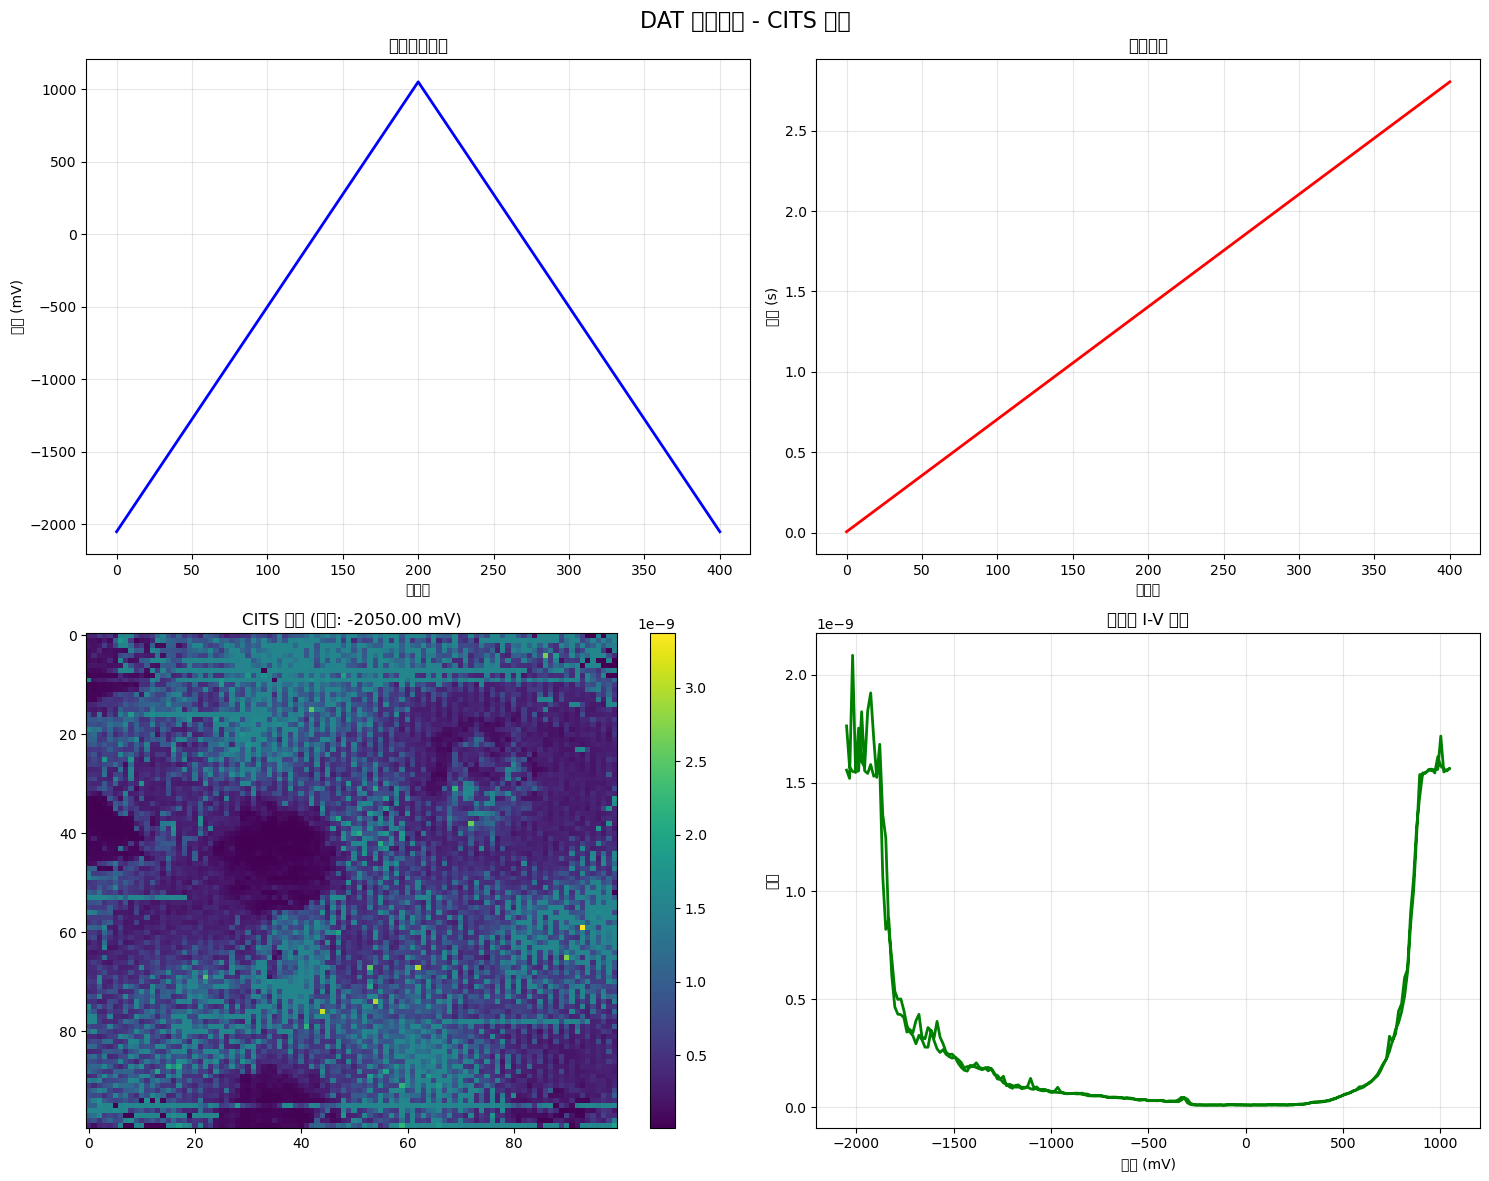


=== 數據統計資訊 ===
數據點總數: 4010000
最小值: 0.000000
最大值: 0.000000
平均值: 0.000000
標準差: 0.000000


In [ ]:
# 第四個 Cell - 數據視覺化和分析
def visualize_dat_data(dat_result):
    """視覺化 DAT 數據"""
    if not dat_result:
        print("沒有 DAT 數據可以視覺化")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f"DAT 數據分析 - {dat_result['measurement_mode']} 模式", fontsize=16)
    
    # 1. 偏壓曲線
    ax1 = axes[0, 0]
    ax1.plot(dat_result['bias_values'], 'b-', linewidth=2)
    ax1.set_title('偏壓掃描曲線')
    ax1.set_xlabel('數據點')
    ax1.set_ylabel(f"偏壓 ({dat_result['units']['bias']})")
    ax1.grid(True, alpha=0.3)
    
    # 2. 時間序列
    ax2 = axes[0, 1]
    ax2.plot(dat_result['times'], 'r-', linewidth=2)
    ax2.set_title('時間序列')
    ax2.set_xlabel('數據點')
    ax2.set_ylabel(f"時間 ({dat_result['units']['time']})")
    ax2.grid(True, alpha=0.3)
    
    if dat_result['measurement_mode'] == 'CITS':
        # 3. CITS: 顯示第一個偏壓的 2D 圖像
        ax3 = axes[1, 0]
        first_bias_data = dat_result['data_3d'][20]  # 第21個偏壓的數據
        im1 = ax3.imshow(first_bias_data, cmap='viridis', aspect='auto')
        ax3.set_title(f'CITS 圖像 (偏壓: {dat_result["bias_values"][0]:.2f} {dat_result["units"]["bias"]})')
        plt.colorbar(im1, ax=ax3)
        
        # 4. CITS: 中心點的 I-V 曲線
        ax4 = axes[1, 1]
        center_y, center_x = np.array(dat_result['data_3d'].shape[1:]) // 2
        iv_curve = dat_result['data_3d'][:, center_y, center_x]
        ax4.plot(dat_result['bias_values'], iv_curve, 'g-', linewidth=2)
        ax4.set_title('中心點 I-V 曲線')
        ax4.set_xlabel(f"偏壓 ({dat_result['units']['bias']})")
        ax4.set_ylabel('電流')
        ax4.grid(True, alpha=0.3)
        
    elif dat_result['measurement_mode'] == 'STS':
        # 3. STS: 顯示所有點的 I-V 曲線 (只顯示前幾條)
        ax3 = axes[1, 0]
        n_curves_to_show = min(5, dat_result['data_2d'].shape[1])
        for i in range(n_curves_to_show):
            ax3.plot(dat_result['bias_values'], dat_result['data_2d'][:, i], 
                    label=f'點 {i+1}', linewidth=2)
        ax3.set_title(f'STS I-V 曲線 (前 {n_curves_to_show} 個點)')
        ax3.set_xlabel(f"偏壓 ({dat_result['units']['bias']})")
        ax3.set_ylabel('電流')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 4. STS: 平均 I-V 曲線
        ax4 = axes[1, 1]
        mean_iv = np.mean(dat_result['data_2d'], axis=1)
        std_iv = np.std(dat_result['data_2d'], axis=1)
        ax4.plot(dat_result['bias_values'], mean_iv, 'r-', linewidth=2, label='平均')
        ax4.fill_between(dat_result['bias_values'], 
                        mean_iv - std_iv, mean_iv + std_iv, 
                        alpha=0.3, label='標準差')
        ax4.set_title('平均 I-V 曲線')
        ax4.set_xlabel(f"偏壓 ({dat_result['units']['bias']})")
        ax4.set_ylabel('電流')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 顯示統計資訊
    print("\n=== 數據統計資訊 ===")
    if dat_result['measurement_mode'] == 'CITS':
        data_flat = dat_result['data_3d'].flatten()
    else:
        data_flat = dat_result['data_2d'].flatten()
    
    print(f"數據點總數: {len(data_flat)}")
    print(f"最小值: {np.min(data_flat):.6f}")
    print(f"最大值: {np.max(data_flat):.6f}")
    print(f"平均值: {np.mean(data_flat):.6f}")
    print(f"標準差: {np.std(data_flat):.6f}")

# 執行視覺化
visualize_dat_data(dat_result)

In [7]:
# 第五個 Cell - 進階分析和檔案資訊比對
def compare_files_info():
    """比對檔案資訊和實際檔案"""
    print("=== 檔案資訊比對 ===")
    
    if not txt_result:
        print("沒有 TXT 解析結果")
        return
    
    print("TXT 檔案中描述的檔案:")
    all_described_files = []
    
    # 收集所有描述的檔案
    for int_file in txt_result['int_files']:
        all_described_files.append(int_file['filename'])
        print(f"  INT: {int_file['filename']}")
    
    for dat_file in txt_result['dat_files']:
        all_described_files.append(dat_file['filename'])
        print(f"  DAT: {dat_file['filename']}")
    
    print(f"\n實際存在的檔案:")
    actual_files = []
    for file_path in testfile_dir.glob("*"):
        if file_path.is_file() and file_path.suffix in ['.int', '.dat']:
            actual_files.append(file_path.name)
            print(f"  {file_path.suffix.upper()}: {file_path.name}")
    
    print(f"\n檔案匹配分析:")
    described_set = set(all_described_files)
    actual_set = set(actual_files)
    
    matching_files = described_set.intersection(actual_set)
    missing_files = described_set - actual_set
    extra_files = actual_set - described_set
    
    print(f"  匹配的檔案 ({len(matching_files)} 個): {list(matching_files)}")
    print(f"  描述但不存在的檔案 ({len(missing_files)} 個): {list(missing_files)}")
    print(f"  存在但未描述的檔案 ({len(extra_files)} 個): {list(extra_files)}")

# 執行檔案比對
compare_files_info()

=== 檔案資訊比對 ===
TXT 檔案中描述的檔案:
  INT: 20250521_Janus Stacking SiO2_13K_113TopoFwd.int
  INT: 20250521_Janus Stacking SiO2_13K_113TopoBwd.int
  INT: 20250521_Janus Stacking SiO2_13K_113Lia1XFwd.int
  INT: 20250521_Janus Stacking SiO2_13K_113Lia1XBwd.int
  INT: 20250521_Janus Stacking SiO2_13K_113Lia1YFwd.int
  INT: 20250521_Janus Stacking SiO2_13K_113Lia1YBwd.int
  INT: 20250521_Janus Stacking SiO2_13K_113Lia1RFwd.int
  INT: 20250521_Janus Stacking SiO2_13K_113Lia1RBwd.int
  INT: 20250521_Janus Stacking SiO2_13K_113Lia2RFwd.int
  INT: 20250521_Janus Stacking SiO2_13K_113Lia2RBwd.int
  INT: 20250521_Janus Stacking SiO2_13K_113It_to_PCFwd.int
  INT: 20250521_Janus Stacking SiO2_13K_113It_to_PCBwd.int
  DAT: 20250521_Janus Stacking SiO2_13K_113It_to_PC_Matrix.dat
  DAT: 20250521_Janus Stacking SiO2_13K_113Lia1R_Matrix.dat
  DAT: 20250521_Janus Stacking SiO2_13K_113Lia1Y_Matrix.dat
  DAT: 20250521_Janus Stacking SiO2_13K_113Lia2R_Matrix.dat

實際存在的檔案:
  .INT: 20250521_Janus Stacking SiO2_13K_1